In [1]:
import librosa
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DATA_DIR = "C:/Users/grawi/Desktop/PythonProjects/dataanalysis/dataset/dataset/"
audio_file_paths = os.listdir(DATA_DIR)
# 'F' : 'Waiting For Food', 'I' : 'Isolated in unfamiliar Environment', 'B' : 'Brushing'
emission_context = {'F' : [], 'I' : [], 'B' : []}

# breed (values: MC = Maine Coon; EU: European Shorthair);
breed = {'MC' : [], 'EU' : []}
#  FI = female, intact; FN: female, neutered; MI: male, intact; MN: male, neutered
sex = {'FI': [], 'FN': [], 'MI': [], 'MN':[]}

for file in audio_file_paths:
    split = file.split('_')
    if split[0] in emission_context.keys():
        emission_context.get(split[0]).append(file)
    
    if split[2] in breed.keys():
        breed.get(split[2]).append(file)

    if split[3] in sex.keys():
        sex.get(split[3]).append(file)

In [3]:
print(f"""Split data based on sex:
    FI: {len(sex['FI'])}, 
    FN: {len(sex['FN'])}, 
    MI: {len(sex['MI'])}, 
    MN: {len(sex['MN'])}, 
    Split data based on breed:
    MC: {len(breed['MC'])}, 
    EU: {len(breed['EU'])}
    Split data based on context:
    F: {len(emission_context['F'])},
    I: {len(emission_context['I'])},
    B: {len(emission_context['B'])}
    """)

Split data based on sex:
    FI: 68, 
    FN: 277, 
    MI: 19, 
    MN: 76, 
    Split data based on breed:
    MC: 188, 
    EU: 252
    Split data based on context:
    F: 92,
    I: 221,
    B: 127
    


In [4]:
example, sr = librosa.load(DATA_DIR+audio_file_paths[0])

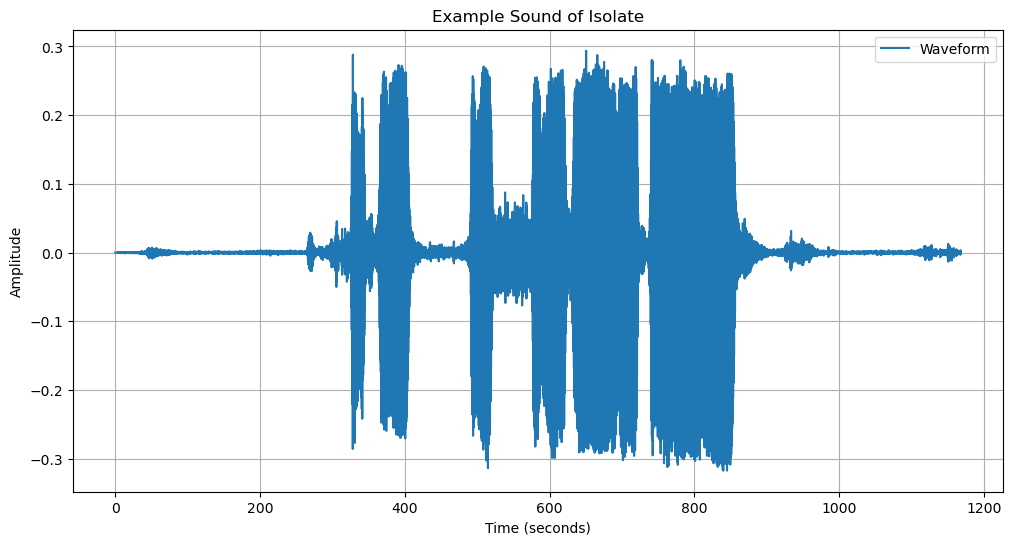

In [5]:
time = librosa.times_like(example, sr=sr)

# Plot the amplitude vs. time graph
plt.figure(figsize=(12, 6))
plt.plot(time, example, label="Waveform")
plt.title("Example Sound of Isolate")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [6]:
data, _ = librosa.effects.trim(example, top_db=30)
trimmed_time = librosa.times_like(data, sr=sr)

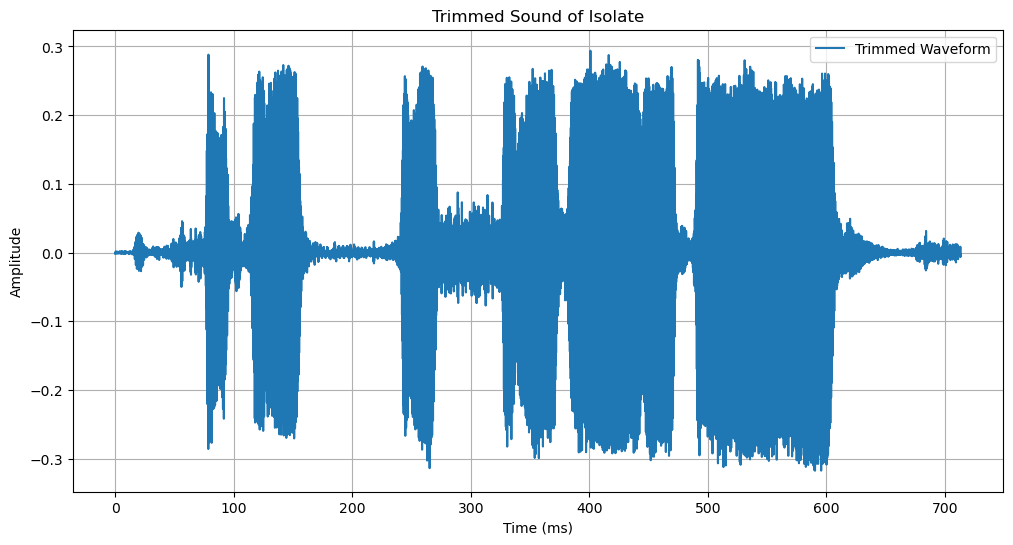

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(trimmed_time, data, label="Trimmed Waveform")
plt.title("Trimmed Sound of Isolate")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

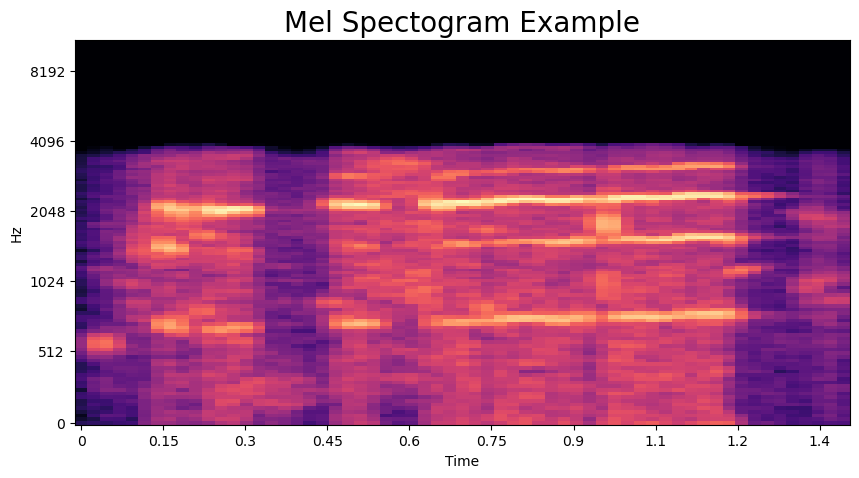

In [24]:
S = librosa.feature.melspectrogram(y=data,
                                   sr=sr,
                                   n_mels=128,)
S_db_mel = librosa.power_to_db(S, ref=np.max)

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='mel',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
plt.show()

In [ ]:
def load_data():
    